# Convection Diffusion Equation with Dirichlet conditions.
## Test problem is chosen to give an exact solution at all nodes of the mesh.

## Governing Equation:

$-\frac{1}{Pe}\Delta u + \mathbf{b} \cdot \nabla u = f$   

## Domain:

$[0,1] \times [0,1]  $



In [1]:
#Import modules
from __future__ import print_function
import dolfin as dl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import numpy as np
%matplotlib inline

## Can not Run Poisson Problem Standard way (no Cartesian Product)


#  but can now using Cartesian Product

## Domain is product of 1 square, 1 unit interval

# Weak Formulation

## General SUPG form

$\frac{1}{Pe}(\nabla u , \nabla v) + (\mathbf{b} \cdot \nabla u, v) + (-\frac{1}{Pe}\Delta u + \mathbf{b} \cdot \nabla u -f, \tau(\mathbf{b} \cdot  \nabla v)  ) = (f,v)$

Let domain $\Omega$ be a cartesian product of two domains $\Omega = \Omega_1 \times \Omega_2$


(Abuse of notation)

$u = us \quad , \quad v = vw$ 

where $u,v$ are the trial, test bases respectively for the subdomain $\Omega_1$ and $s,w$ are the trial, test basis respectively for $\Omega_2$:

$\frac{1}{Pe}(\nabla (us) , \nabla (vw))_{\Omega} + (\mathbf{b} \cdot \nabla (us), vw)_{\Omega} + (-\frac{1}{Pe}\Delta (us) + \mathbf{b} \cdot \nabla (us) -f, \tau(\mathbf{b} \cdot \nabla(vw))  )_{\Omega} = (f,vw)_{\Omega}$

Using chain rule first:

$\frac{1}{Pe}(s \nabla u + u \nabla s , w \nabla v + v \nabla w)_{\Omega} + (\mathbf{b} \cdot (s \nabla u + u \nabla s), vw)_{\Omega} + (-\frac{1}{Pe}(s\Delta (u) + u \Delta (s)) + \mathbf{b} \cdot (s \nabla (u) + u \nabla(s)) -f, \tau(\mathbf{b} \cdot (w \nabla (v) + v \nabla (w)))  )_{\Omega} = (f,vw)_{\Omega}$

Now using Fubini's theorem:

$\frac{1}{Pe}\left[ (\nabla u, \nabla v)_{\Omega_1}(s,w)_{\Omega_2} +  (u,v)_{\Omega_1}( \nabla s ,  \nabla w)_{\Omega_2}\right] + (\mathbf{b} \cdot \nabla u, v)_{\Omega_1} (s,w)_{\Omega_2} + (u,v)_{\Omega_1}(\mathbf{b} \cdot \nabla s,w)_{\Omega_2} - \frac{\tau}{Pe}\left[(\Delta u, \mathbf{b} \cdot \nabla v)_{\Omega_1} (sw)_{\Omega_2} + (\Delta u , v)_{\Omega_1}(s, \mathbf{b} \cdot  \nabla w)_{\Omega_2} + (u, \mathbf{b} \cdot \nabla v)_{\Omega_1}(\Delta s, w)_{\Omega_2} + (u,v)_{\Omega_1}(\Delta s, \mathbf{b} \cdot \nabla w)_{\Omega_2}\right] + \tau \left[ (\mathbf{b} \cdot \nabla u, \mathbf{b} \cdot \nabla v)_{\Omega_1}(s,w)_{\Omega_2} + (\mathbf{b} \cdot \nabla u, v)_{\Omega_1}(s , \mathbf{b} \cdot \nabla w)_{\Omega_2} + (u, \mathbf{b} \cdot \nabla v)_{\Omega_1}(\mathbf{b} \cdot \nabla s, w )_{\Omega_2} + (u,v)_{\Omega_1}(\mathbf{b} \cdot \nabla s, \mathbf{b} \cdot \nabla w)_{\Omega_2}\right] = f_{dof}(v)_{\Omega_1}(w)_{\Omega_2} - \tau f_{dof}(\mathbf{b} \cdot v)_{\Omega_1}(w)_{\Omega_2} - \tau f_{dof} (v)_{\Omega_1}(\mathbf{b} \cdot \nabla w)_{\Omega_2}$


Now assuming the advection velocity $\mathbf{b}$ is in only one direction of the subdomain (say $\Omega_2$) and 0 in the others

If we assume that $\mathbf{b}$ is only non-zero along one sunbdomain (say $\Omega_2$ for this case) then the above weak form reduces to


$\frac{1}{Pe}\left[ (\nabla u, \nabla v)_{\Omega_1}(s,w)_{\Omega_2} +  (u,v)_{\Omega_1}( \nabla s ,  \nabla w)_{\Omega_2}\right]+ (u,v)_{\Omega_1}(\mathbf{b} \cdot \nabla s,w)_{\Omega_2} - \frac{\tau}{Pe}\left[ (\Delta u , v)_{\Omega_1}(s, \mathbf{b} \cdot  \nabla w)_{\Omega_2} + (u,v)_{\Omega_1}(\Delta s, \mathbf{b} \cdot \nabla w)_{\Omega_2}\right] + \tau \left[   (u,v)_{\Omega_1}(\mathbf{b} \cdot \nabla s, \mathbf{b} \cdot \nabla w)_{\Omega_2}\right] = f_{dof}(v)_{\Omega_1}(w)_{\Omega_2}  - \tau f_{dof} (v)_{\Omega_1}(\mathbf{b} \cdot \nabla w)_{\Omega_2} $

Now we can construct a system of equations and solve for $u = uv$, we define the smaller stiffness matrices. First index represents the subdomain, second index represents the weak form term:

$K_{11} = (\nabla u, \nabla v)_{\Omega_1} $

$K_{21} = ( \nabla s ,  \nabla w)_{\Omega_2}$

$ K_{12} = (u,v)_{\Omega_1} $

$K_{22} = (s,w)_{\Omega_2}$

$K_{23} = (\mathbf{b} \cdot \nabla s,w)_{\Omega_2}$

$K_{13} = (\Delta u , v)_{\Omega_1} $

$K_{24} = (s, \mathbf{b} \cdot  \nabla w)_{\Omega_2}$

$K_{25} = (\Delta s, \mathbf{b} \cdot \nabla w)_{\Omega_2}$

$K_{26} = (\mathbf{b} \cdot \nabla s, \mathbf{b} \cdot \nabla w)_{\Omega_2}$

$F_{1} = (v)_{\Omega_1} $

$F_{2} = (w)_{\Omega_2} $

$F_{3} = (\mathbf{b} \cdot \nabla w)_{\Omega_2} $

The global system can be constructed using the kronecker product: 

$\mathbf{A}\mathbf{u} = \mathbf{F}$

$\mathbf{A} = \frac{1}{Pe} K_{11} \otimes K_{22} + \frac{1}{Pe} K_{12} \otimes K_{21} + K_{12} \otimes K_{23} -\frac{\tau}{Pe} K_{13} \otimes K_{24} - \frac{\tau}{Pe} K_{12} \otimes K_{25} + \tau K_{12} \otimes K_{26} = f_{dof} F_1 \otimes F_2 - \tau f_{dof} F_1 \otimes F_3$

And then dirichlet boundary conditions are added in by substituting the rows corresponding to the global degree of freedom on the boundary with the row of the identity matrix, and then putting the right hand side to the value of the boundary

## Exact solution:

$u_{exact} =  (-4(x-0.5)^2+1)\left[ y + \frac{e^{Pe \cdot b_y \cdot y} - 1 }{1 - e^{Pe \cdot b_y}}\right] $

## Boundary condition:

$u = 0 $ on the boundary 

## Variable assignments:

$Pe  = 100$

$\mathbf{b} = (0,1)$

$f = -\frac{1}{Pe}\Delta u_{exact} + \mathbf{b} \cdot \nabla u_{exact}$

In [2]:
#Some auxillary functions defined first
def cartesian_product(array1,array2):
    #gives cartesian product of 2 vectors
    dim1,n=array1.shape
    dim2,n=array2.shape
    out_arr=np.zeros((dim1*dim2,2))
    c=0
    for a in range(dim1):
        for b in range(dim2):
            out_arr[c,:]=[array1[a],array2[b]]
            c=c+1
    return out_arr
def cartesian_product_coords(array1,array2):
    #gives cartesian product of 2 vectors
    dim1,n1=array1.shape
    dim2,n2=array2.shape
    out_arr=np.zeros((dim1*dim2,n1+n2))
    c=0
    for a in range(dim1):
        for b in range(dim2):
            #print(array1[a,:])
            #print(array2[b,:])
            out_arr[c,:]=np.append(array1[a,:],array2[b,:])
            c=c+1
    return out_arr
def cartesian_product_dofs(array1,array2):
    #gives cartesian product of 2 1d vectors
    dim1=len(array1)
    dim2=len(array2)
    out_arr=np.zeros((dim1*dim2,2))
    c=0
    for a in range(dim1):
        for b in range(dim2):
            out_arr[c,:]=[array1[a],array2[b]]
            c=c+1
    return out_arr


def cartesian_form_to_kroneck_form(indeces, len_dim_2):
    #designed to take list of indexes in the cartesian form
    #translate to single form as kron product would
    #only for cartesian product between 2 spaces
    #expects matrix with n rows, 2 columns
    num_indeces=indeces.shape[0]
    out_arr=np.zeros(num_indeces)
    for n in range(num_indeces):
        out_arr[n] = indeces[n,0]*len_dim_2 + indeces[n,1]
    return out_arr

In [3]:
#cartesian product of 2 1-d domains with dirichlet boundary
num_elem = 50
num_elem_1 = num_elem
num_elem_2 = num_elem

mesh1 = dl.UnitIntervalMesh(num_elem_1)
mesh2 = dl.UnitIntervalMesh(num_elem_2)

#create function spaces for each piece
V1 = dl.FunctionSpace(mesh1, 'P', 1)
V2 = dl.FunctionSpace(mesh2, 'P', 1)

#create trial and test functions
u1_trial = dl.TrialFunction(V1)
v1_test = dl.TestFunction(V1)
u2_trial = dl.TrialFunction(V2)
v2_test = dl.TestFunction(V2)

#Advection vector
#this will only work if b is the length of dimension of space 2\
b_vel = 1.0
b = dl.Constant(b_vel)
Pe = 100.0
#tau is hardcoded for this 2d case
h_elem = 1.0/num_elem_2
Pe_elem = b_vel*h_elem*Pe/2
tau = h_elem/(2*b_vel)*(np.cosh(Pe_elem)/np.sinh(Pe_elem) - 1/Pe_elem)


#assemble weak forms (more complex due to chain rule)
stiffness_form11 = dl.inner(dl.grad(u1_trial), dl.grad(v1_test)) * dl.dx
stiffness_form12 = u1_trial*v1_test* dl.dx
stiffness_form13 = dl.div(dl.grad(u1_trial))*v1_test*dl.dx



stiffness_form21 = dl.inner(dl.grad(u2_trial), dl.grad(v2_test)) * dl.dx
stiffness_form22 = u2_trial*v2_test * dl.dx

#need to remove dot product if b is one-d, this will work if second subdomain is not 1d
#stiffness_form23 = dl.dot(b,dl.grad(u2_trial))*v2_test*dl.dx
#stiffness_form24 = u2_trial* dl.dot(b,dl.grad(v2_test))*dl.dx
#stiffness_form25 = dl.div(dl.grad(u2_trial))*dl.dot(b,dl.grad(v2_test))*dl.dx
#stiffness_form26 = dl.dot(b,dl.grad(u2_trial))*dl.dot(b,dl.grad(v2_test))*dl.dx
stiffness_form23 = b*u2_trial.dx(0)*v2_test*dl.dx
stiffness_form24 = u2_trial* b*v2_test.dx(0)*dl.dx
stiffness_form25 = dl.div(dl.grad(u2_trial))*b*v2_test.dx(0)*dl.dx
stiffness_form26 = b*u2_trial.dx(0)*b*v2_test.dx(0)*dl.dx


#assign right hand side (will need to generalize later)
#f = dl.Constant(-12.0)


#assemble stiffness matrices (only will work for linear forms)
K11 = dl.assemble(stiffness_form11)
K12 = dl.assemble(stiffness_form12)
K13 = dl.assemble(stiffness_form13)
K21 = dl.assemble(stiffness_form21) 
K22 = dl.assemble(stiffness_form22)
K23 = dl.assemble(stiffness_form23)
K24 = dl.assemble(stiffness_form24)
K25 = dl.assemble(stiffness_form25)
K26 = dl.assemble(stiffness_form26)



#assign right hand sides 
rhs_form1 = v1_test * dl.dx
rhs_form2 = v2_test * dl.dx
#this works for higher dimesnion, some reason doesn't like in 1d
#rhs_form3 = dl.dot(b,dl.grad(v2_test))*dl.dx
rhs_form3 = b*v2_test.dx(0)*dl.dx

b1 = dl.assemble(rhs_form1)
b2 = dl.assemble(rhs_form2)
b3 = dl.assemble(rhs_form3)

#use this to mark boundary (Dirichlet) 
def boundary(x, on_boundary):
    return on_boundary

#This function is simply used to mark the boundary (not the actual boundary condition)
u_D1 = dl.Expression('1.0', degree=2)


#establish dummy functions
dum1=dl.Function(V1)
dum2=dl.Function(V2)


#create boundary conditions
bc1 = dl.DirichletBC(V1, u_D1, boundary)
bc2 = dl.DirichletBC(V2, u_D1, boundary)

#apply to vectors to mark boundaries
bc1.apply(dum1.vector())
bc2.apply(dum2.vector())

#get index number for each boundary cooordinates in subdomain
boundary_dofs1 = np.where(dum1.vector()==1.0)[0]
boundary_dofs2 = np.where(dum2.vector()==1.0)[0]

#print indeces of boundaries in subdomains
print(boundary_dofs1)
print(boundary_dofs2)

#need all physical coordinates in case we need for calculations
dof_coordinates1=V1.tabulate_dof_coordinates()
dof_coordinates2=V2.tabulate_dof_coordinates()

#physical coordinates should be just cartesian product of 2 dof maps in same order that kron product operates
global_dof=cartesian_product_coords(dof_coordinates1,dof_coordinates2)

#coordinates of boundary in each subdomain
boundary_coord1 = dof_coordinates1[boundary_dofs1]
boundary_coord2 = dof_coordinates2[boundary_dofs2]


#now connect subdomain indeces to global boundary (turn this into function in future)
#maybe in future for speed we can precompute number of boundary dofs
global_boundary_dofs=np.empty((len(boundary_dofs1)*len(dof_coordinates2) + len(dof_coordinates1)*len(boundary_dofs2),2))

ctr=0
for j in boundary_dofs1:
    global_boundary_dofs[ctr*len(dof_coordinates2):(ctr+1)*len(dof_coordinates2),:] = \
    cartesian_product_dofs(np.array([j]),np.arange(dof_coordinates2.shape[0]))
    ctr=ctr+1
    
last_ind = (ctr)*len(dof_coordinates2)


for j in boundary_dofs2:
    global_boundary_dofs[last_ind:last_ind+len(dof_coordinates1),:] = \
    cartesian_product_dofs(np.arange(dof_coordinates1.shape[0]),np.array([j]))
    last_ind = last_ind+len(dof_coordinates1)    


#sorts and also eliminates duplicates of "corners"
global_boundary_dofs=np.unique(global_boundary_dofs,axis=0)


#have cartesian product of dof at entire boundary (this form should be easy to get coordinates in if needed)
#now need to convert to global system dof as the kron function does
global_boundary_dofs=cartesian_form_to_kroneck_form(global_boundary_dofs, len(dof_coordinates2))
global_boundary_dofs=global_boundary_dofs.astype(int)




#assemble global system using kronecker product
K11 = np.array(K11.array())
K12 = np.array(K12.array())
K13 = np.array(K13.array())
K21 = np.array(K21.array())
K22 = np.array(K22.array())
K23 = np.array(K23.array())
K24 = np.array(K24.array())
K25 = np.array(K25.array())
K26 = np.array(K26.array())


A=(1/Pe)*(np.kron(K11,K22) + np.kron(K12,K21)) + np.kron(K12,K23) - (tau/Pe)*(np.kron(K13,K24)+np.kron(K12,K25))\
+ tau*np.kron(K12,K26)




b1 = np.array(b1)
b2 = np.array(b2)
b3 = np.array(b3)
B=np.kron(b1,b2) - tau*np.kron(b1,b3)

#multiply by nodal values of f
#note this is hardcoded for 2d case
y=global_dof[:,1]
x= global_dof[:,0]
f_dof = -1/Pe*(-8*(y+ (np.exp(Pe*b_vel*y)-1)/(1-np.exp(Pe*b_vel))) \
        + (-4*(x-0.5)**2+1)*(Pe**2*b_vel**2*np.exp(Pe*b_vel*y))/(1-np.exp(Pe*b_vel))) +\
        b_vel*(-4*(x-0.5)**2+1)*(1 + Pe*b_vel*np.exp(Pe*b_vel*y)/(1-np.exp(Pe*b_vel)))


B=f_dof*B

#need to apply bcs using boundary_dofs info
#set the rows in the boundary to 1 on diagonal
K_bound = np.zeros(A.shape)
for i in global_boundary_dofs:
    K_bound[i,i] = 1

A[global_boundary_dofs,:] = K_bound[global_boundary_dofs,:]


#set the value of solution on boundary as rhs
B[global_boundary_dofs] = np.zeros(len(global_boundary_dofs))
u=np.zeros(len(B))

#solve(A,u,B)
u=np.linalg.solve(A,B)



[ 0 50]
[ 0 50]


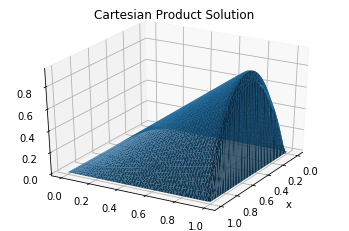

In [4]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(x, y, u, linewidth=0.2, antialiased=True)
ax.view_init(30, 30)
ax.set_xlabel('x')
ax.set_label('y')
ax.set_label('u')
ax.set_title('Cartesian Product Solution')
plt.show()

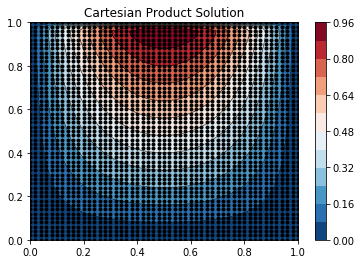

[ 0.  0.  0. ...,  0.  0.  0.]


In [5]:
#now find way to plot (we know we have regular grid in this case)
fig,  ax2 = plt.subplots(nrows=1)

ax2.tricontour(global_dof[:,0], global_dof[:,1], u, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(global_dof[:,0], global_dof[:,1], u, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(global_dof[:,0], global_dof[:,1], 'ko', ms=3)
ax2.set(xlim=(0, 1), ylim=(0, 1))
ax2.set_title('Cartesian Product Solution')

plt.subplots_adjust(hspace=0.5)
plt.show()

print(u)

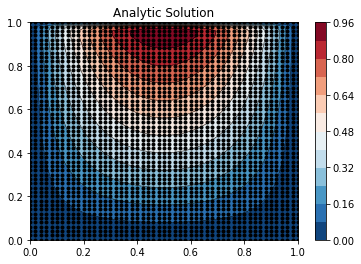

[ 0.  0.  0. ...,  0.  0.  0.]


In [6]:
#plot analytic solution
#now find way to plot (we know we have regular grid in this case)
fig,  ax2 = plt.subplots(nrows=1)

u_true = (-4*(global_dof[:,0]-0.5)**2+1)*(global_dof[:,1]  +  (np.exp(Pe*b_vel*global_dof[:,1])-1)/(1- np.exp(Pe*b_vel)))

ax2.tricontour(global_dof[:,0], global_dof[:,1], u_true, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(global_dof[:,0], global_dof[:,1], u_true, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(global_dof[:,0], global_dof[:,1], 'ko', ms=3)
ax2.set(xlim=(0, 1), ylim=(0, 1))
ax2.set_title('Analytic Solution')

plt.subplots_adjust(hspace=0.5)
plt.show()
print(u_true)

In [7]:
print('dof')
print(len(u))
print('h')
print(1/num_elem)
print('l infinity')
print(max(np.absolute(u-u_true)))
print('l2')
print(np.dot(np.absolute(u-u_true),np.absolute(u-u_true)))
print('sum of absolute error')
print(np.sum(np.absolute(u-u_true)))

dof
2601
h
0.02
l infinity
0.000649801125824
l2
0.000195667302203
sum of absolute error
0.582875603106


In [8]:
#check to see what fenics expression looks like
#Mesh = dl.UnitSquareMesh(15,200)
#print(Pe)
#f0 = dl.Expression('(x[0]  +  (expl(Pe*b_vel*x[0])-1)/(1- expl(Pe*b_vel)))*(x[1]  +  (expl(Pe*b_vel*x[1])-1)/(1- expl(Pe*b_vel)))',Pe=Pe,b_vel=b_vel,degree=4,domain=Mesh)
#f1= dl.Expression('(x[0]+(exp(1*x[0]/0.01)-1)/(1-exp(1/0.01)))*(x[1]+(exp(1*x[1]/0.01)-1)/(1-exp(1/0.01)))',degree = 4,domain = Mesh)
#dl.plot(f1,mesh=Mesh)
